In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google. colab import files
uploaded=files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise.xlsx


In [ ]:
dt=pd.read_excel('Data_Pathrise.xlsx')
df=dt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [ ]:
df.isna().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.drop('cohort_tag',axis=1,inplace=True)

In [ ]:
df=df[df['pathrise_status']!= 'Active']
df=df[df['pathrise_status']!= 'Break']
df=df[df['pathrise_status']!= 'MIA']

In [ ]:
df.drop('pathrise_status',axis=1,inplace=True)

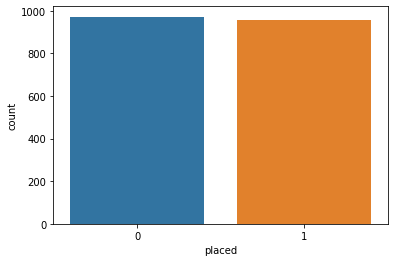

In [ ]:
sns.countplot(x='placed',data=df)

In [ ]:
numric_df=df[['program_duration_days','number_of_applications','number_of_interviews']]
cat_df=df.drop(['program_duration_days','number_of_applications','number_of_interviews'],axis=1)

In [ ]:
Q1 = numric_df.quantile(0.02)
Q3 = numric_df.quantile(0.98)
IQR = Q3 - Q1
idx = ~((numric_df < (Q1 - 1.5 * IQR)) | (numric_df > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = pd.concat([numric_df.loc[idx], cat_df.loc[idx]], axis=1)

In [ ]:
df['race']=df['race'].replace(np.nan,'East Asian or Asian American')

In [ ]:
df['highest_level_of_education']=df['highest_level_of_education'].replace(np.nan,"Bachelor's Degree")

In [ ]:
for i in range(0,1928):
  if type(df.iloc[i,5]) != str :
    #print('length_of_job_search')
    if df.iloc[i,7]== '5+ years':
       df.iloc[i,5]='Less than one month'
    else :
       df.iloc[i,5]='1-2 months'

In [ ]:
df['biggest_challenge_in_search']=df['biggest_challenge_in_search'].replace(np.nan,'Hearing back on my applications')

In [ ]:
for i in range(0,1928):
  if type(df.iloc[i,7]) != str :
    if df.iloc[i,2]==1:
      if df.iloc[i,6]=='Getting past phone screens':
        df.iloc[i,7]='Less than one year'
      elif df.iloc[i,6] =='Figuring out which jobs to apply for' or df.iloc[i,6] ==  'Getting past final round interviews':
        df.iloc[i,7]='3-4 years'
      else:
        df.iloc[i,7]='1-2 years'
    else: 
       if df.iloc[i,6]== 'Technical interviewing':
         df.iloc[i,7]='Less than one year'
       elif df.iloc[i,6]=='Lack of relevant experience':
          df.iloc[i,7]='3-4 years'
       else:
          df.iloc[i,7]='1-2 years'

In [ ]:
df_success=df[df['placed']==1]
df_fail=df[df['placed']==0]

In [ ]:
df_success_=df.dropna(subset=['number_of_interviews'])

In [ ]:
df_fail_=df.dropna(subset=['number_of_interviews'])

In [ ]:
import statistics

In [ ]:
for i in range(0,len(df)):
  numberofinterv=[]
  if type(df.iloc[i,9]) != str :
    lenghtofjobS=df.iloc[i,5]
    if df.iloc[i,2]==1:
      for j in range(0,len(df_success_)):
        if df_success_.iloc[j,5]==df.iloc[i,5]:
          numberofinterv.append(df_success_.iloc[j,9])
      df.iloc[i,9]=statistics.mean(numberofinterv)
    else:
      for k in range(0,len(df_fail_)):
        if df_fail_.iloc[k,5]==df.iloc[i,5]:
          numberofinterv.append(df_fail_.iloc[k,9])
      df.iloc[i,9]=statistics.mean(numberofinterv)

In [ ]:
for i in range(0,1928):
  if type(df.iloc[i,3]) != str :
    if df.iloc[i,5]== '6 months to a year':
       df.iloc[i,3]='Unemployed'
    else :
       df.iloc[i,3]='Student'

In [ ]:
df['work_authorization_status']=df['work_authorization_status'].replace(np.nan,'Citizen')

In [ ]:
df['gender']=df['gender'].replace(np.nan,'Male')

In [ ]:
df.isna().sum()

primary_track                  0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1928 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       1928 non-null   int64  
 3   employment_status            1928 non-null   object 
 4   highest_level_of_education   1928 non-null   object 
 5   length_of_job_search         1928 non-null   object 
 6   biggest_challenge_in_search  1928 non-null   object 
 7   professional_experience      1928 non-null   object 
 8   work_authorization_status    1928 non-null   object 
 9   number_of_interviews         1928 non-null   float64
 10  number_of_applications       1928 non-null   int64  
 11  gender                       1928 non-null   object 
 12  race                         1928 non-null   object 
dtypes: float64(2), int

In [ ]:
df.to_csv('process_new.csv')

In [ ]:
from google.colab import files
files.download("process_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>